<a href="https://colab.research.google.com/github/antbartash/max_temp/blob/main/2.feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = 'https://raw.githubusercontent.com/antbartash/max_temp/master/data/data_features.csv'
data = pd.read_csv(data_path)

print(data.shape)
data.head()

(40778, 42)


,TARGET,TMAX_d1,TMAX_d1_d2_diff,TMAX_3day_mean,TMAX_3day_std,TMAX_3day_min,TMAX_3day_max,TMAX_3day_median,TMAX_5day_mean,TMAX_5day_std,...,TMAX_14day_mean_diff,MONTH,STATION_USW00003967,STATION_USW00012916,STATION_USW00013960,STATION_USW00024025,STATION_USW00024233,STATION_USW00093067,STATION_USW00093225,STATION_USW00094728
0,15.6,15.0,-1.1,13.700000,3.251154,10.0,16.1,15.0,12.98,3.063005,...,0.200000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.4,15.6,0.6,15.566667,0.550757,15.0,16.1,15.6,14.22,2.443768,...,0.357143,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.2,14.4,-1.2,15.000000,0.600000,14.4,15.6,15.0,14.22,2.443768,...,0.435714,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.1,17.2,2.8,15.733333,1.404754,14.4,17.2,15.6,15.66,1.071448,...,0.792857,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.9,21.1,3.9,17.566667,3.365016,14.4,21.1,17.2,16.66,2.692211,...,1.071429,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def kdeplot(data, feature):
  fig, ax = plt.subplots(figsize=(12, 3))
  sns.kdeplot(data[feature], fill=True, ax=ax)
  plt.title(feature)
  plt.tight_layout()
  plt.show()

def target_plot(data, feature, target):
  data_tmp = data.copy()
  data_tmp['feature_grouped'] = pd.qcut(data_tmp[feature], 10, duplicates='drop')
  counts = data_tmp.value_counts('feature_grouped', sort=False)
  means = data_tmp.groupby('feature_grouped', observed=True)[target].mean()
  fig, ax1 = plt.subplots(figsize=(12, 3))
  ax1.bar(counts.index.astype(str), counts, color='tab:blue', label='Count')
  ax2 = ax1.twinx()
  ax2.bar(means.index.astype(str), np.nan, color='tab:blue', label='Count')
  ax2.plot(means.index.astype(str), means, color='tab:orange', label='Mean TMAX')
  ax1.set_ylabel('Count')
  ax2.set_ylabel(feature)
  plt.title(feature)
  plt.legend()
  plt.tight_layout()
  plt.show()

def describe(data, feature):
  display(data[[feature]].describe().transpose())




=== TMAX_d1 ===


,count,mean,std,min,25%,50%,75%,max
TMAX_d1,40778.0,20.359427,10.752142,-22.7,12.8,21.7,28.9,53.9


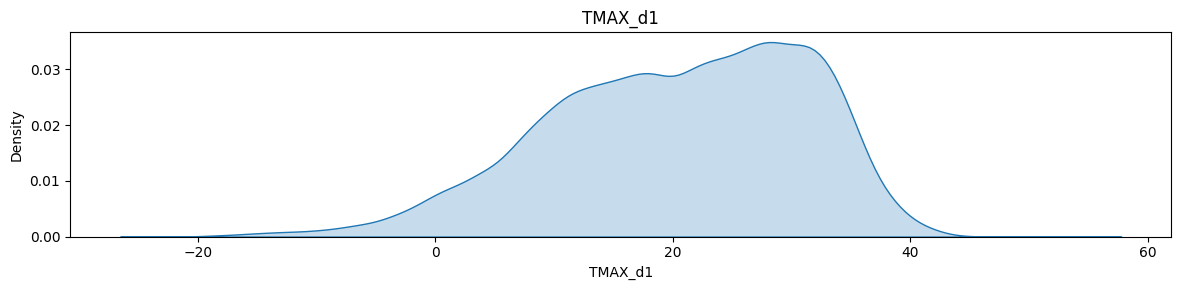

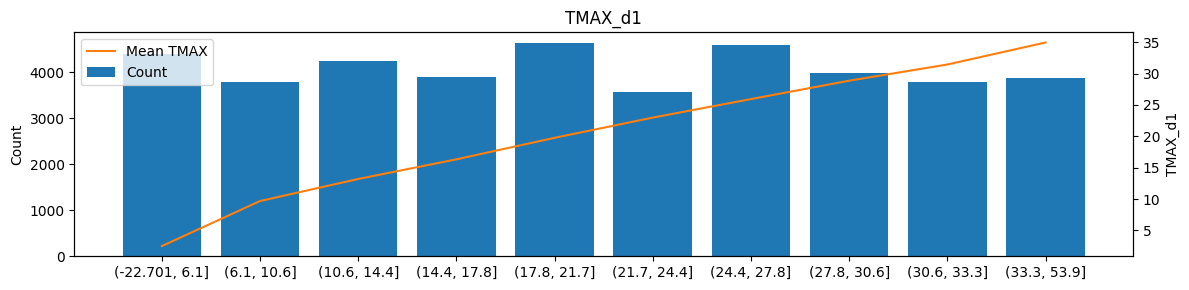




=== TMAX_d1_d2_diff ===


,count,mean,std,min,25%,50%,75%,max
TMAX_d1_d2_diff,40778.0,0.000569,4.334154,-40.0,-2.2,0.5,2.3,40.0


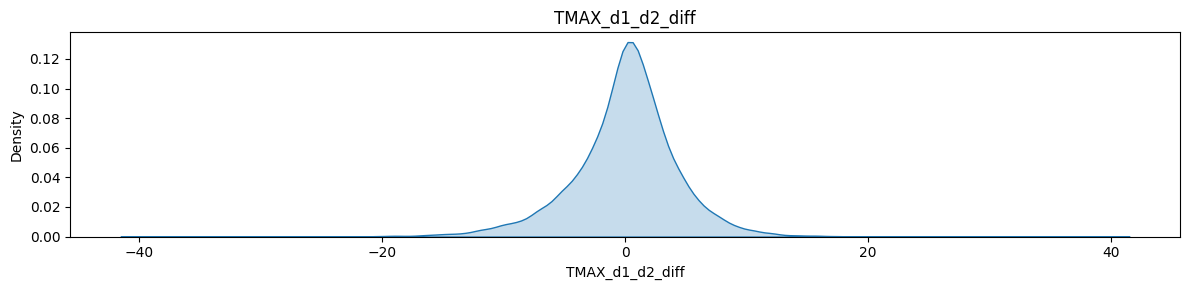

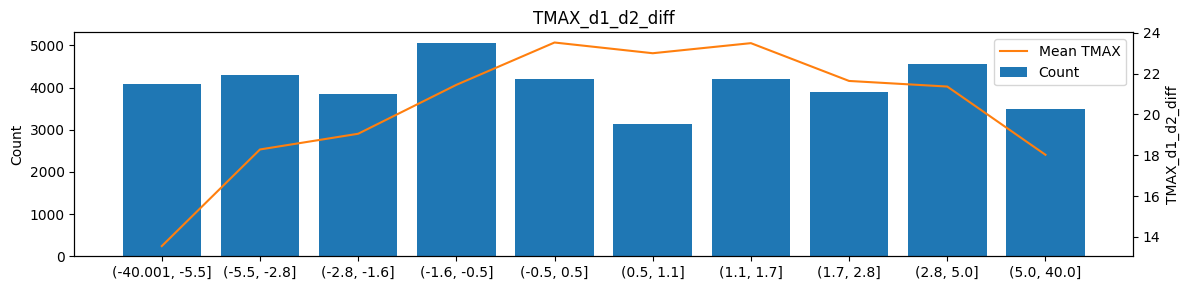




=== TMAX_3day_mean ===


,count,mean,std,min,25%,50%,75%,max
TMAX_3day_mean,40778.0,20.358926,10.378425,-21.4,12.8,21.3,28.866667,45.566667


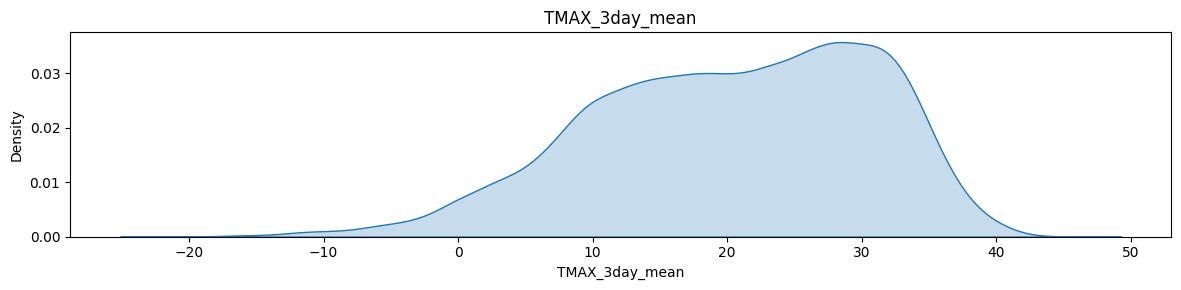

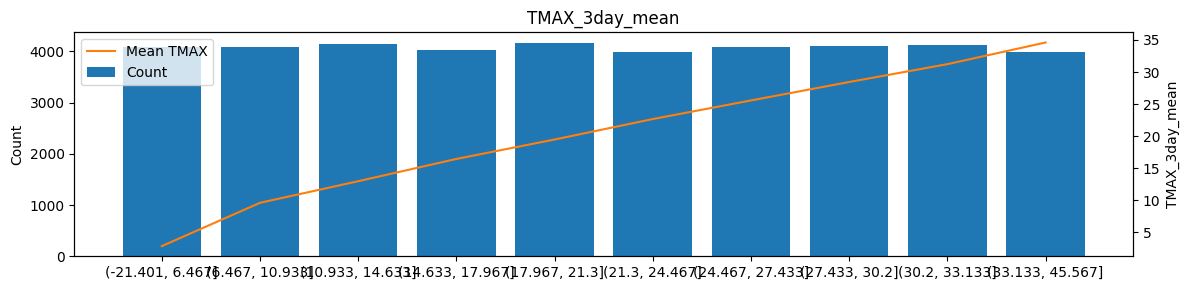




=== TMAX_3day_std ===


,count,mean,std,min,25%,50%,75%,max
TMAX_3day_std,40778.0,2.762737,2.056133,0.0,1.270171,2.251666,3.732292,23.094011


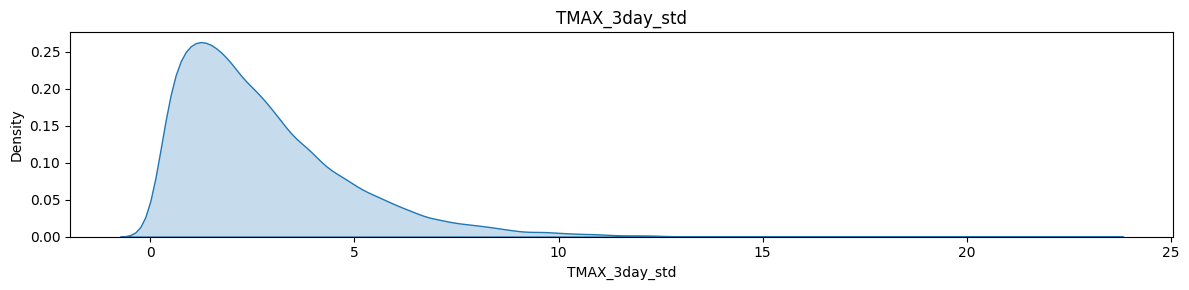

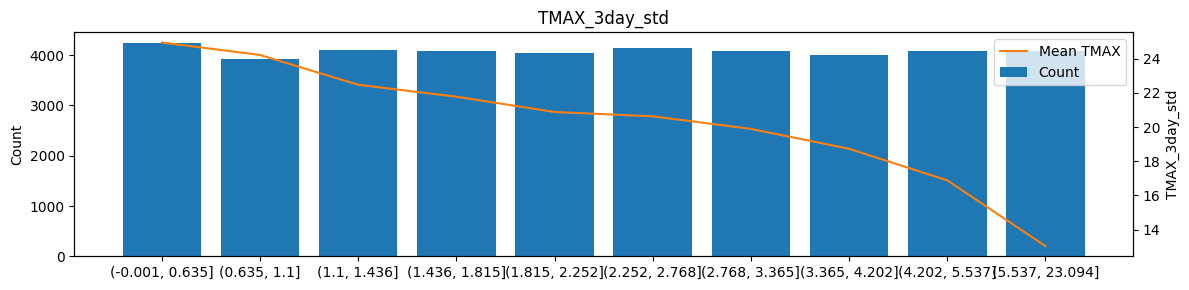




=== TMAX_3day_min ===


,count,mean,std,min,25%,50%,75%,max
TMAX_3day_min,40778.0,17.697545,11.14805,-22.7,10.0,18.3,26.7,43.3


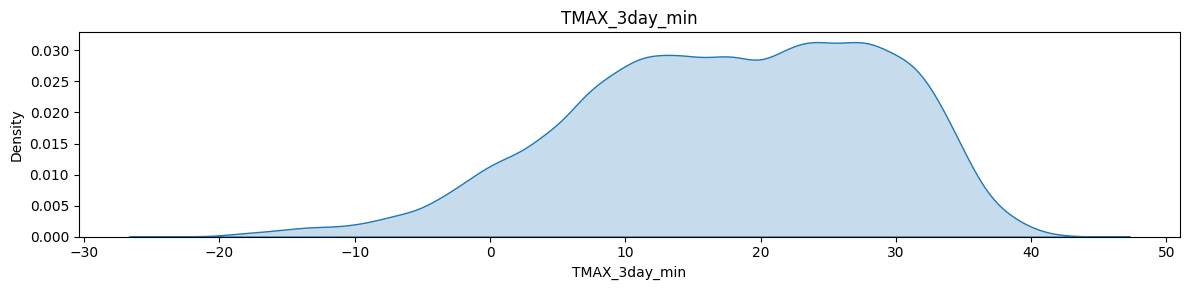

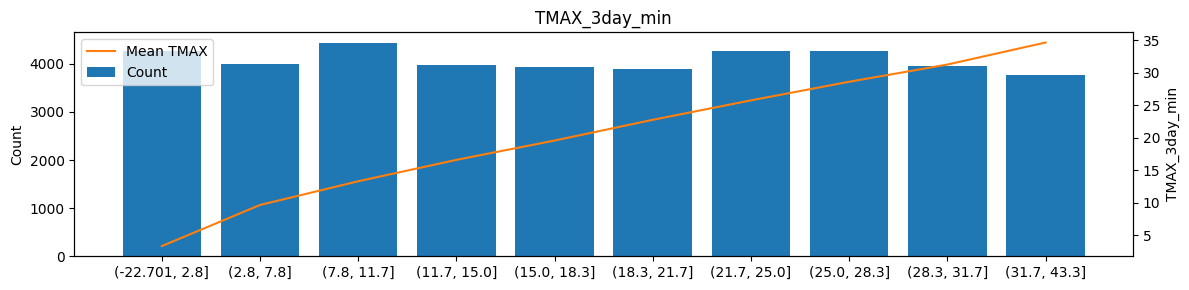




=== TMAX_3day_max ===


,count,mean,std,min,25%,50%,75%,max
TMAX_3day_max,40778.0,22.964702,9.889871,-18.8,16.1,24.4,31.1,53.9


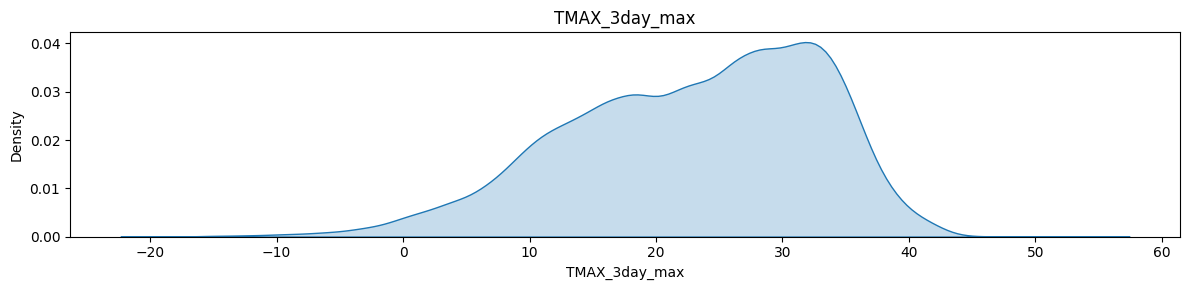

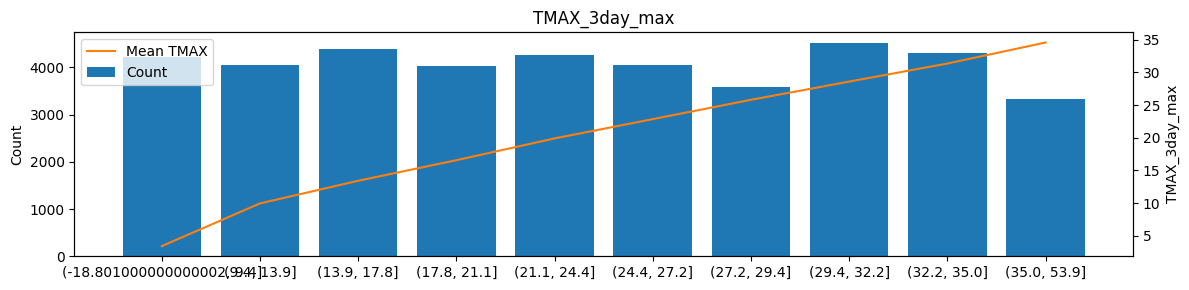




=== TMAX_3day_median ===


,count,mean,std,min,25%,50%,75%,max
TMAX_3day_median,40778.0,20.41453,10.530493,-22.7,12.8,21.7,28.9,46.7


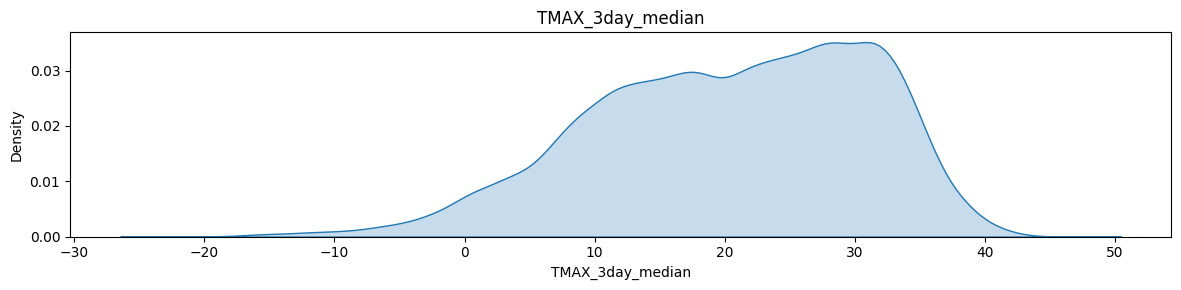

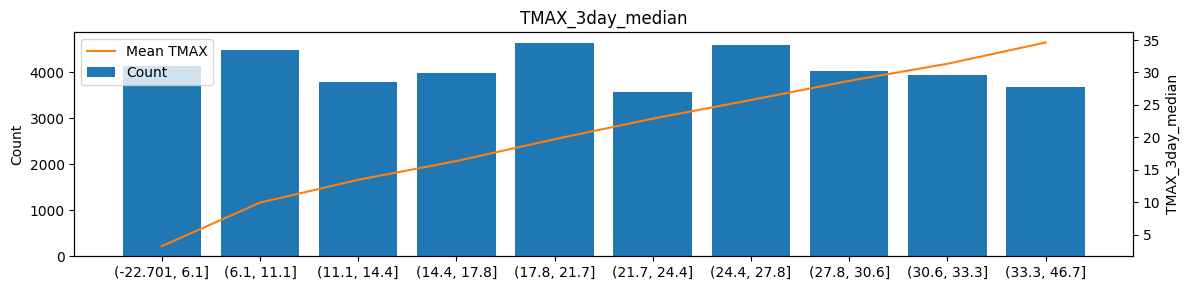




=== TMAX_5day_mean ===


,count,mean,std,min,25%,50%,75%,max
TMAX_5day_mean,40778.0,20.358556,10.181101,-18.58,12.88,21.22,28.76,44.8


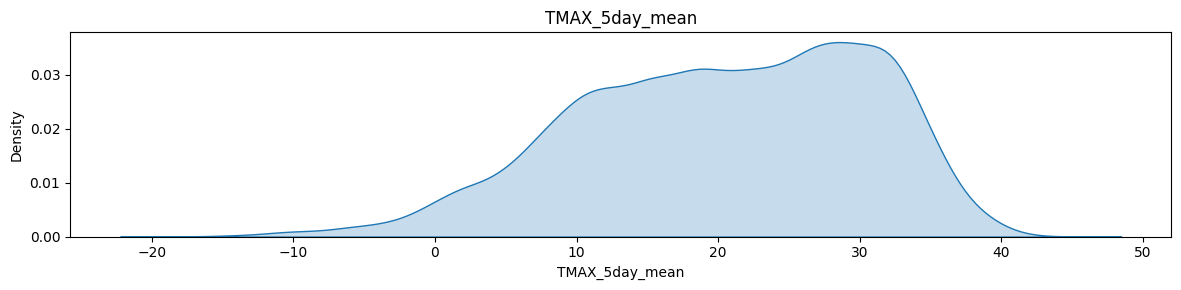

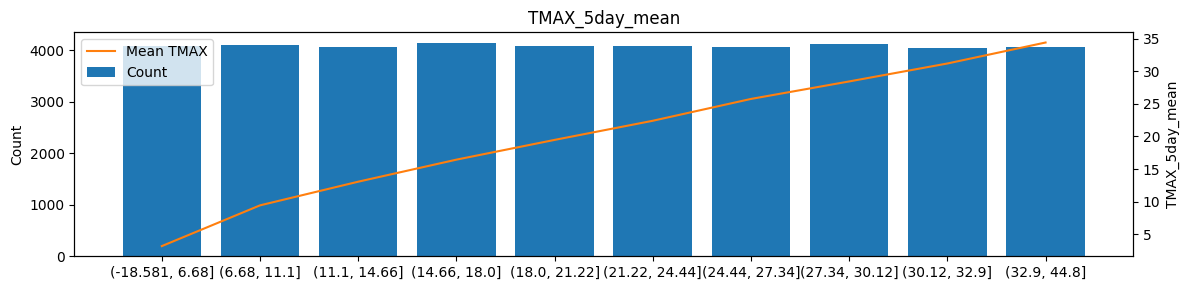




=== TMAX_5day_std ===


,count,mean,std,min,25%,50%,75%,max
TMAX_5day_std,40778.0,3.313475,1.99728,0.0,1.834394,2.901293,4.391469,18.313328


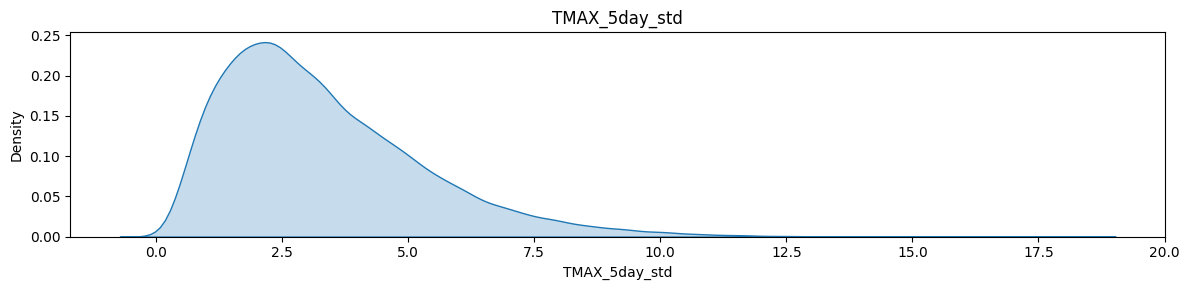

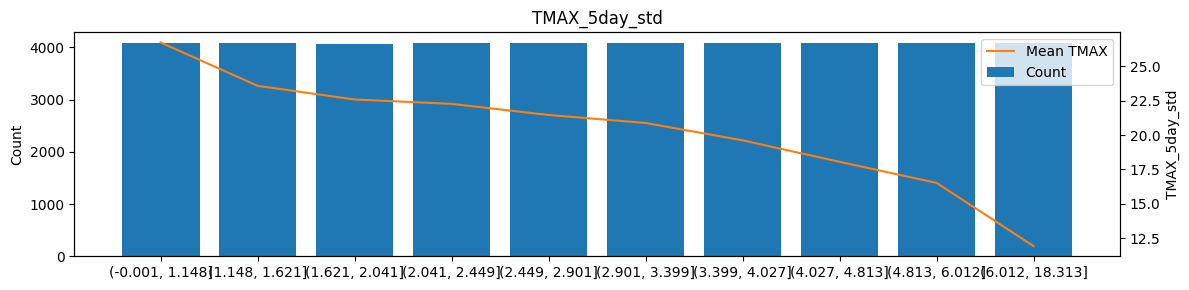




=== TMAX_5day_min ===


,count,mean,std,min,25%,50%,75%,max
TMAX_5day_min,40778.0,16.226169,11.292869,-22.7,8.3,16.7,25.6,41.7


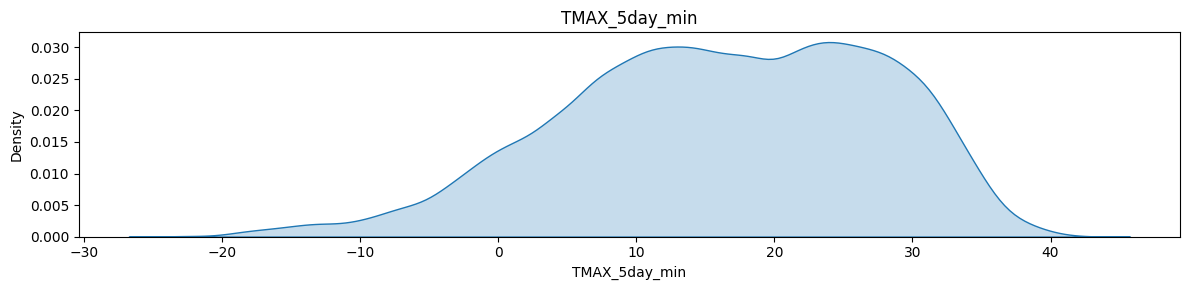

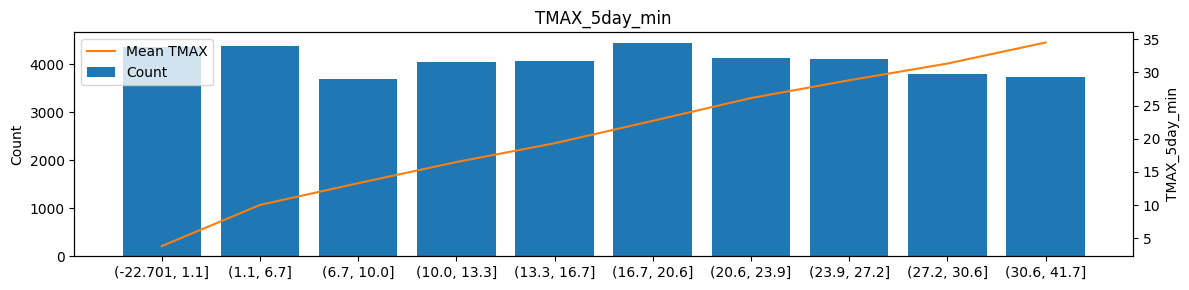




=== TMAX_5day_max ===


,count,mean,std,min,25%,50%,75%,max
TMAX_5day_max,40778.0,24.287118,9.42367,-15.5,17.8,25.6,31.7,53.9


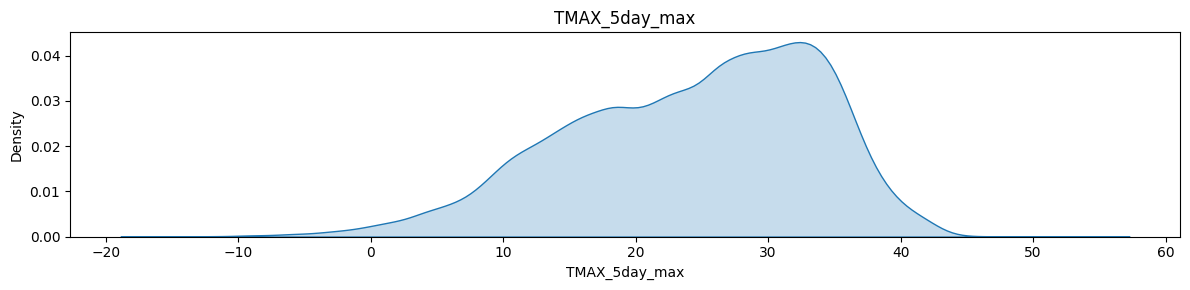

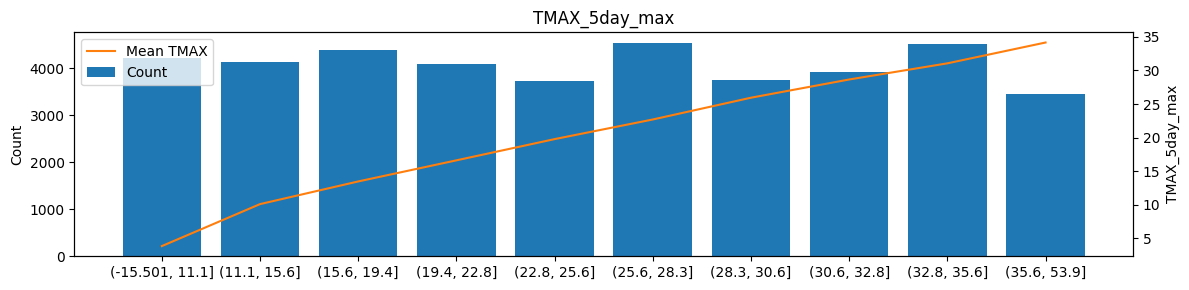




=== TMAX_5day_median ===


,count,mean,std,min,25%,50%,75%,max
TMAX_5day_median,40778.0,20.455572,10.354645,-18.8,12.8,21.7,28.9,45.6


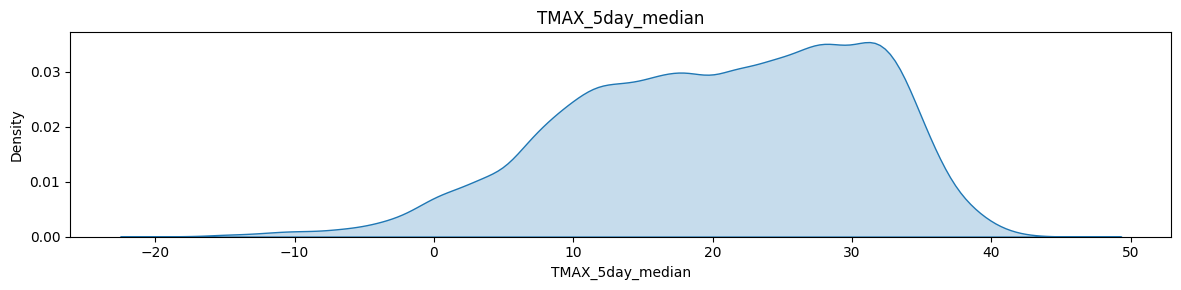

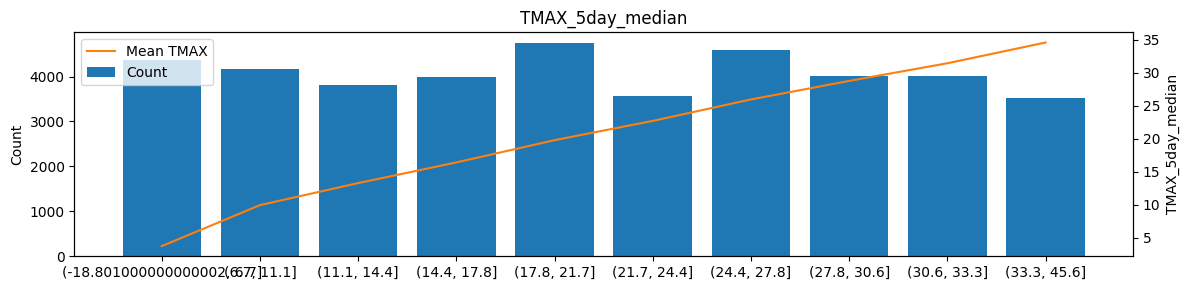




=== TMAX_7day_mean ===


,count,mean,std,min,25%,50%,75%,max
TMAX_7day_mean,40778.0,20.357923,10.059532,-17.842857,12.928571,21.114286,28.657143,43.585714


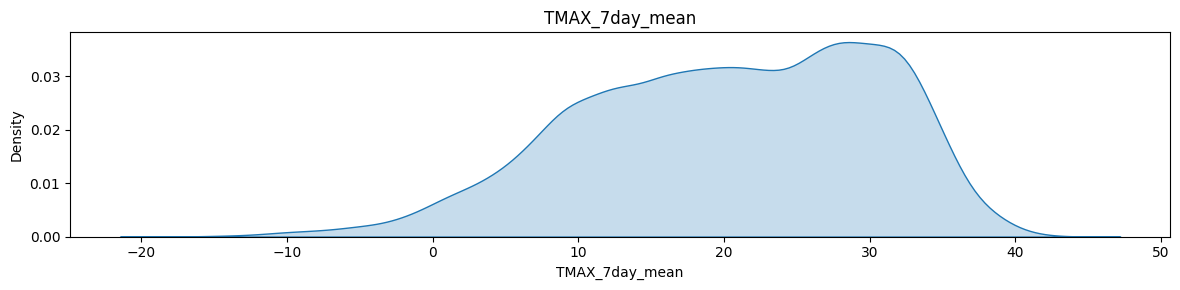

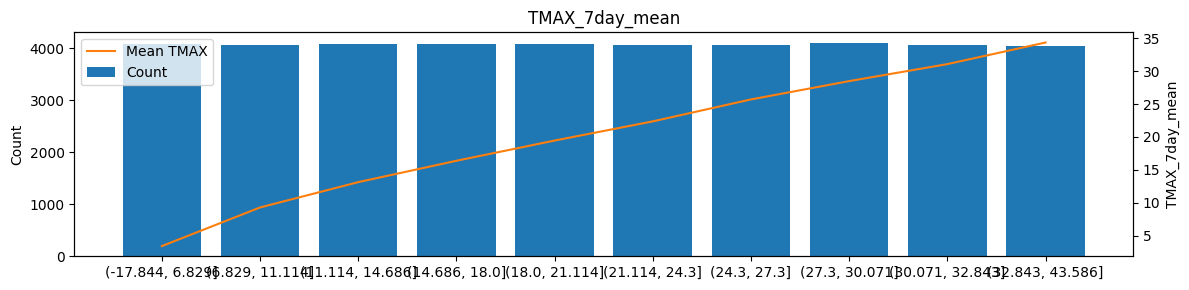




=== TMAX_7day_std ===


,count,mean,std,min,25%,50%,75%,max
TMAX_7day_std,40778.0,3.609686,1.957954,0.226779,2.140761,3.246977,4.71309,16.427199


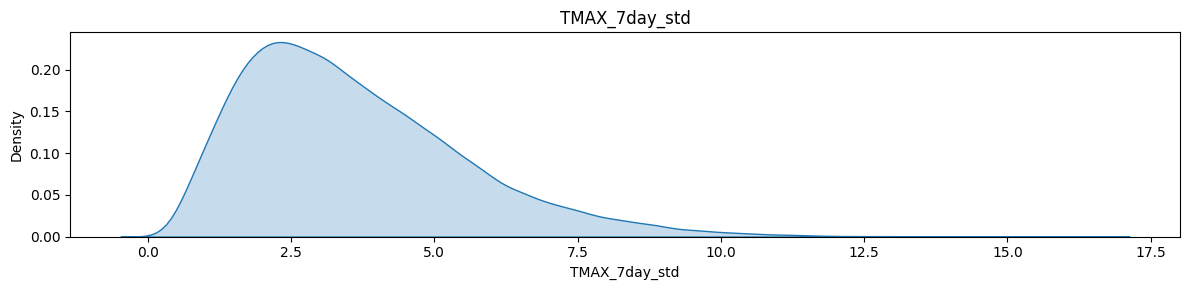

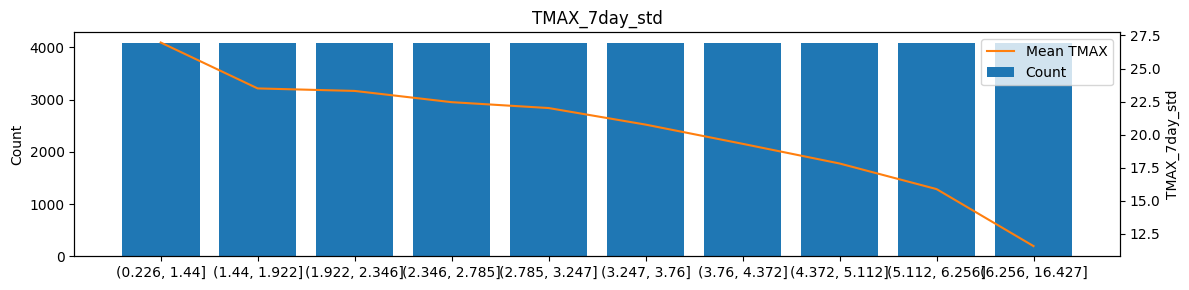




=== TMAX_7day_min ===


,count,mean,std,min,25%,50%,75%,max
TMAX_7day_min,40778.0,15.24423,11.38226,-22.7,7.2,15.6,24.4,40.6


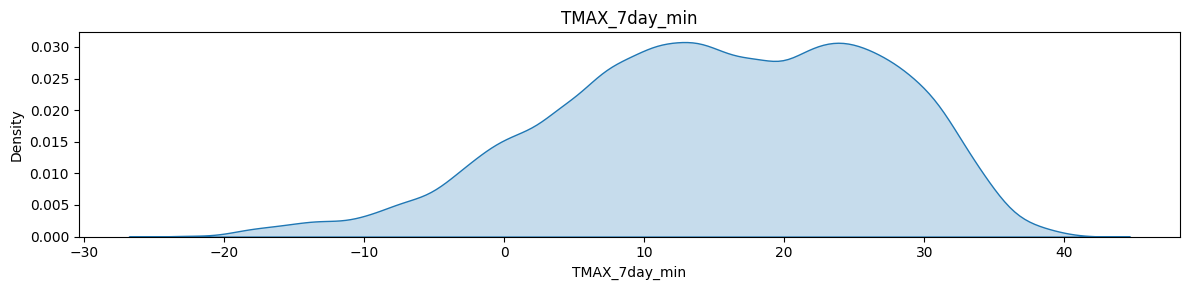

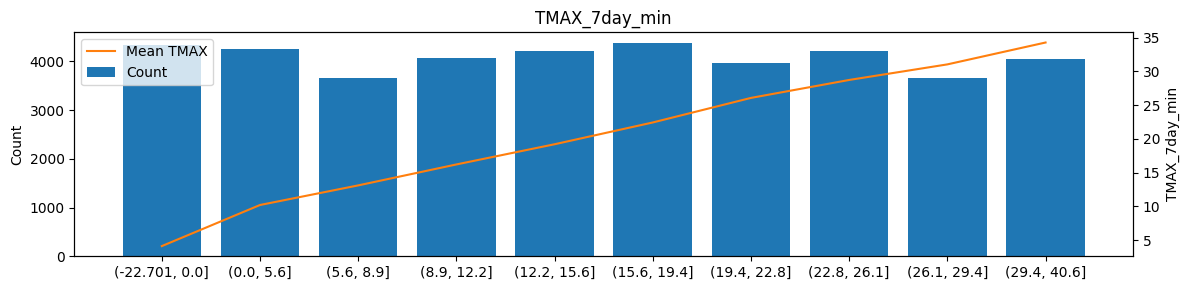




=== TMAX_7day_max ===


,count,mean,std,min,25%,50%,75%,max
TMAX_7day_max,40778.0,25.126227,9.133152,-14.9,18.3,26.7,32.2,53.9


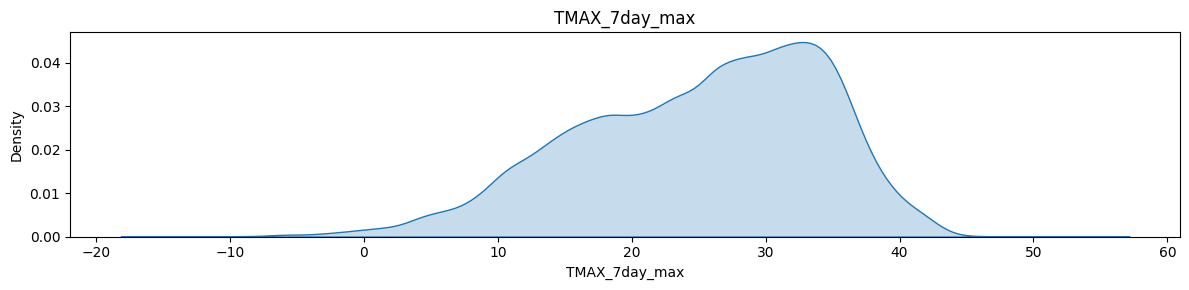

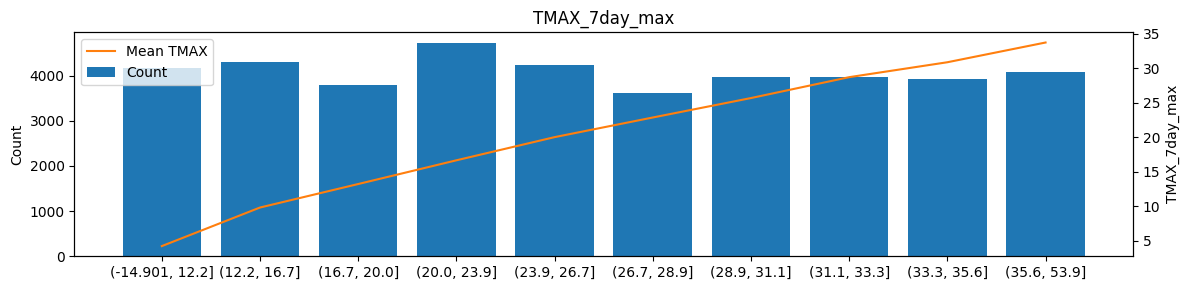




=== TMAX_7day_median ===


,count,mean,std,min,25%,50%,75%,max
TMAX_7day_median,40778.0,20.4833,10.228035,-17.7,12.8,21.1,28.9,43.3


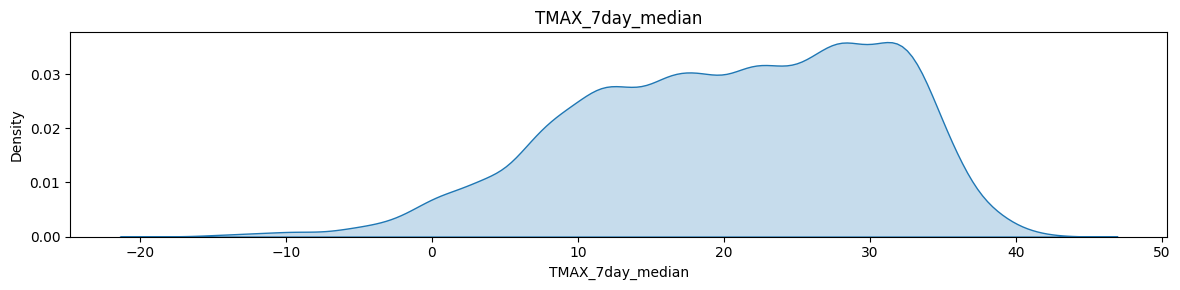

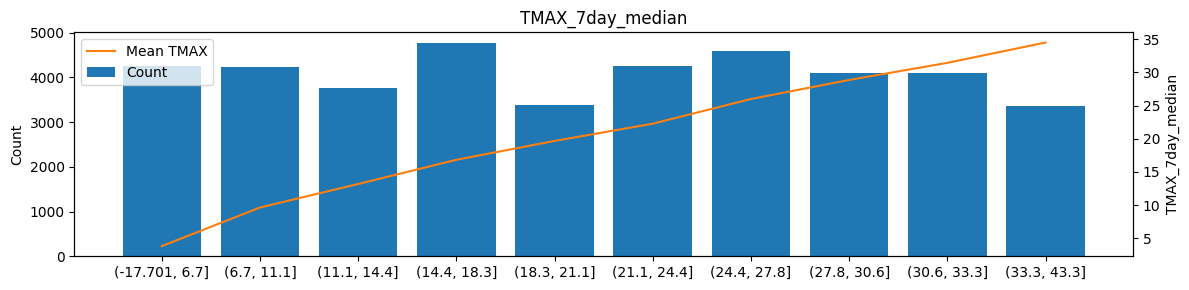




=== TMAX_10day_mean ===


,count,mean,std,min,25%,50%,75%,max
TMAX_10day_mean,40778.0,20.355821,9.944288,-15.02,13.0,21.095,28.65,42.68


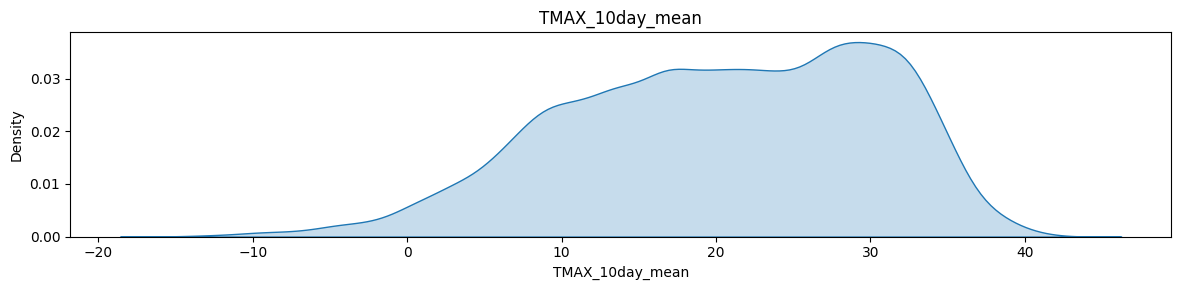

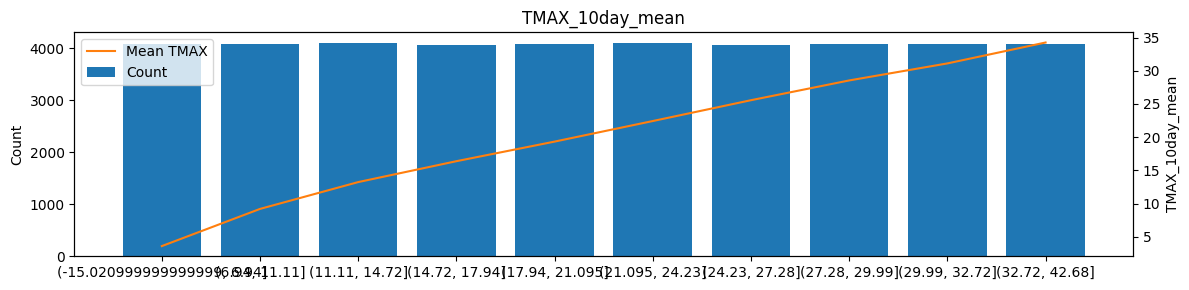




=== TMAX_10day_std ===


,count,mean,std,min,25%,50%,75%,max
TMAX_10day_std,40778.0,3.876615,1.916016,0.309839,2.417276,3.569508,4.98813,14.432914


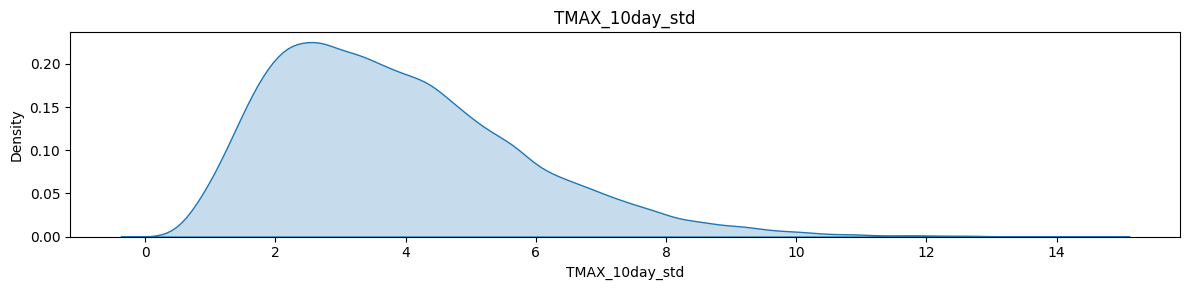

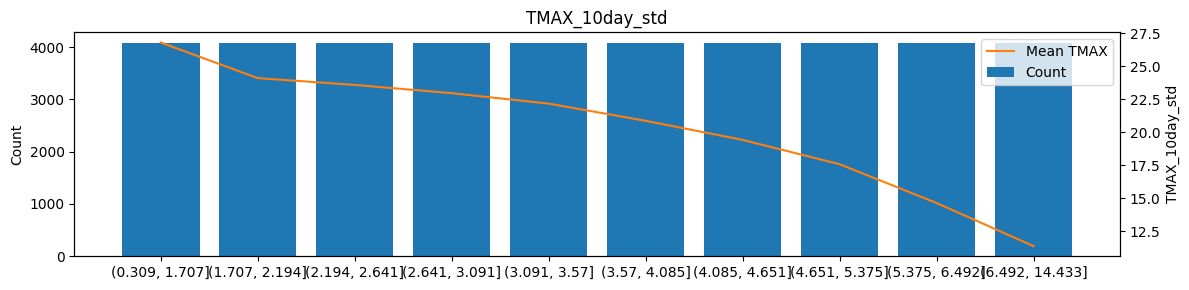




=== TMAX_10day_min ===


,count,mean,std,min,25%,50%,75%,max
TMAX_10day_min,40778.0,14.205917,11.489846,-22.7,6.1,14.4,23.3,40.6


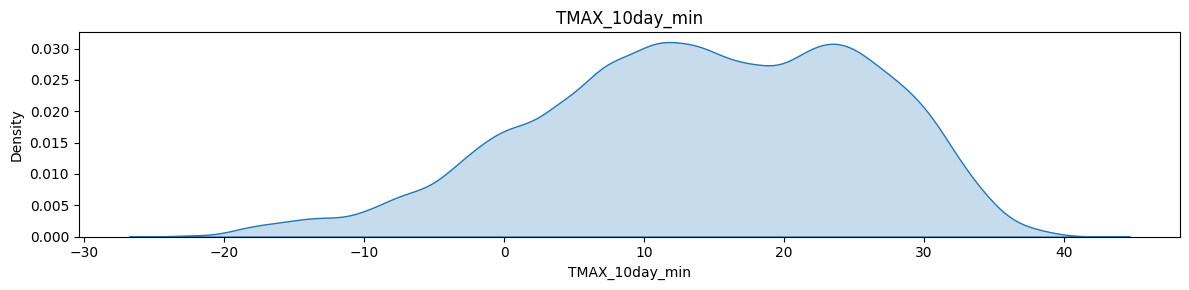

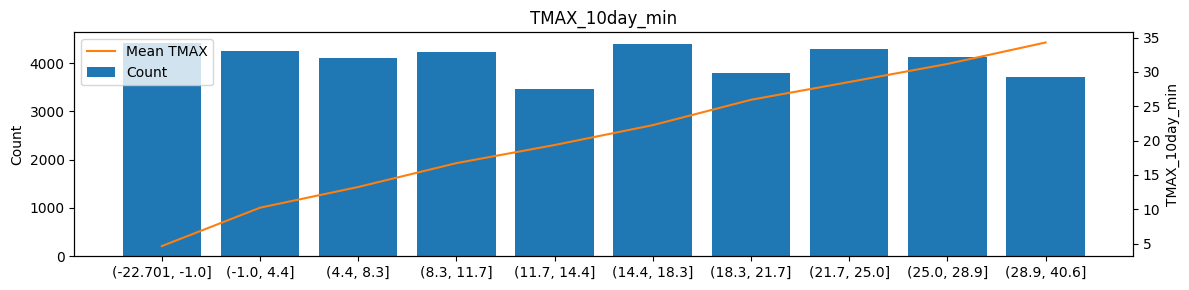




=== TMAX_10day_max ===


,count,mean,std,min,25%,50%,75%,max
TMAX_10day_max,40778.0,25.981318,8.846269,-12.1,19.4,27.2,32.8,53.9


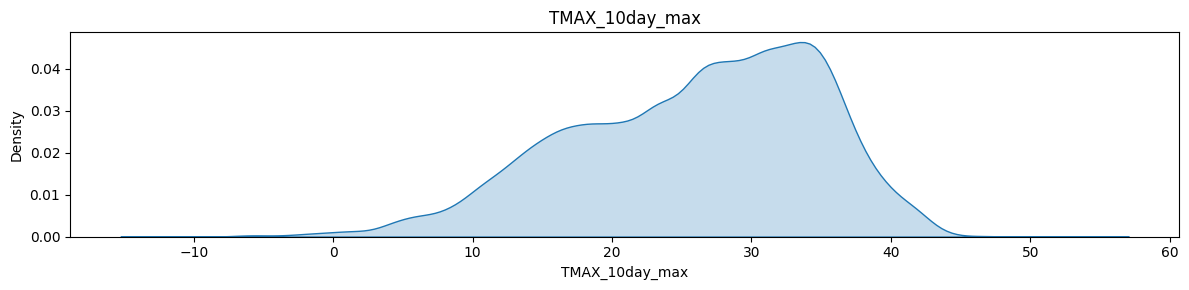

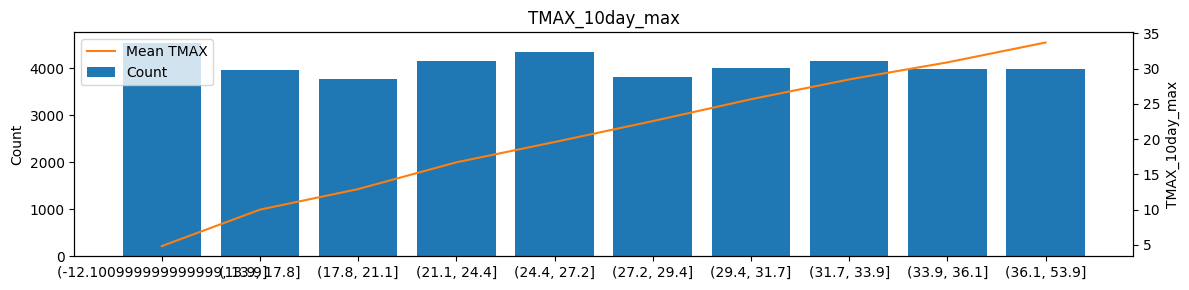




=== TMAX_10day_median ===


,count,mean,std,min,25%,50%,75%,max
TMAX_10day_median,40778.0,20.496391,10.08636,-16.3,13.05,21.4,28.9,41.95


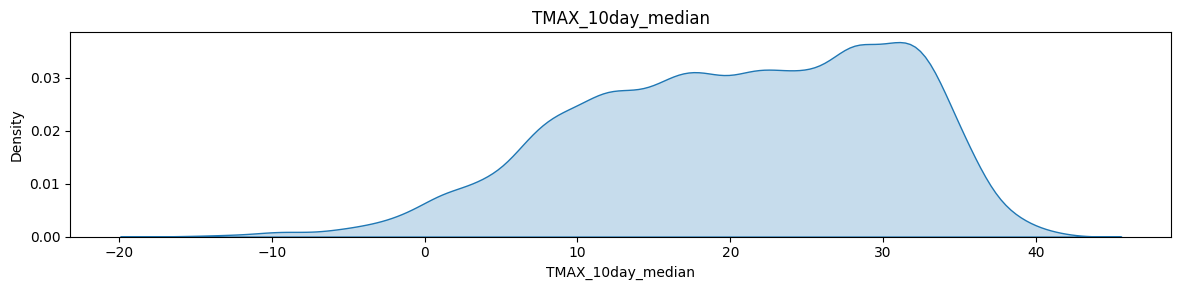

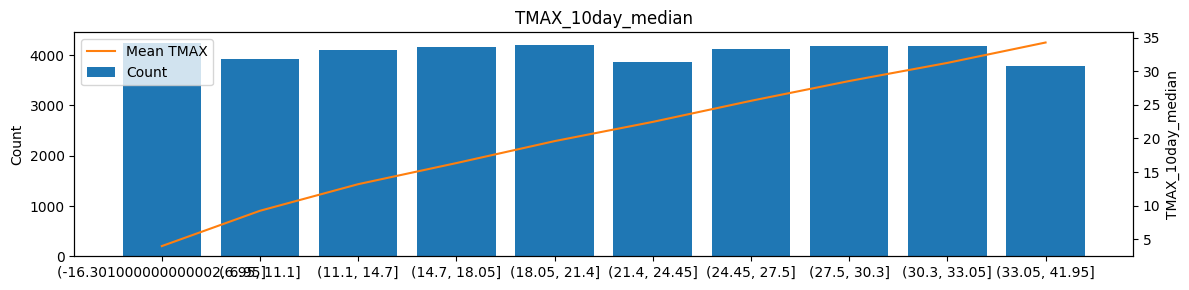




=== TMAX_14day_mean ===


,count,mean,std,min,25%,50%,75%,max
TMAX_14day_mean,40778.0,20.35228,9.847952,-12.635714,13.071429,21.071429,28.621429,40.971429


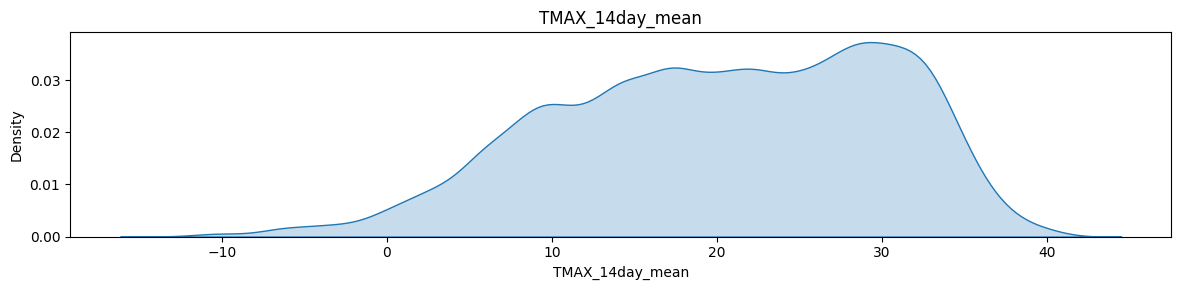

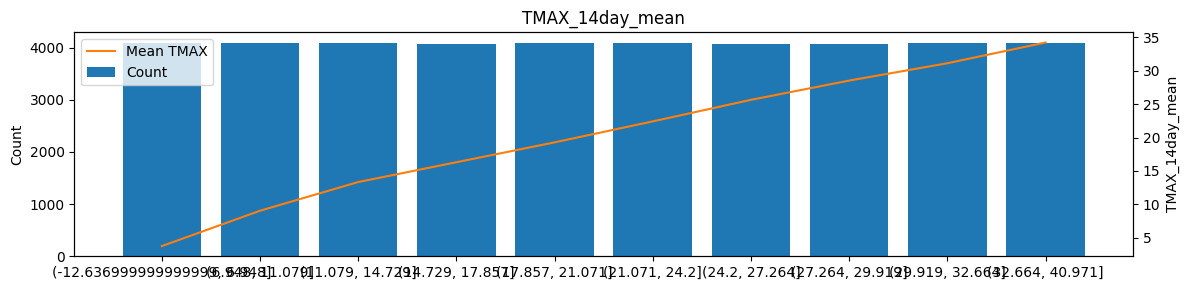




=== TMAX_14day_std ===


,count,mean,std,min,25%,50%,75%,max
TMAX_14day_std,40778.0,4.093572,1.881277,0.510548,2.64895,3.816282,5.222931,13.119845


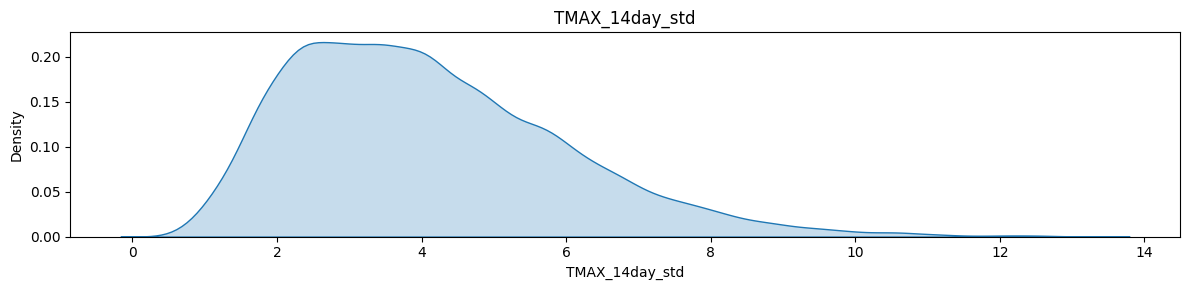

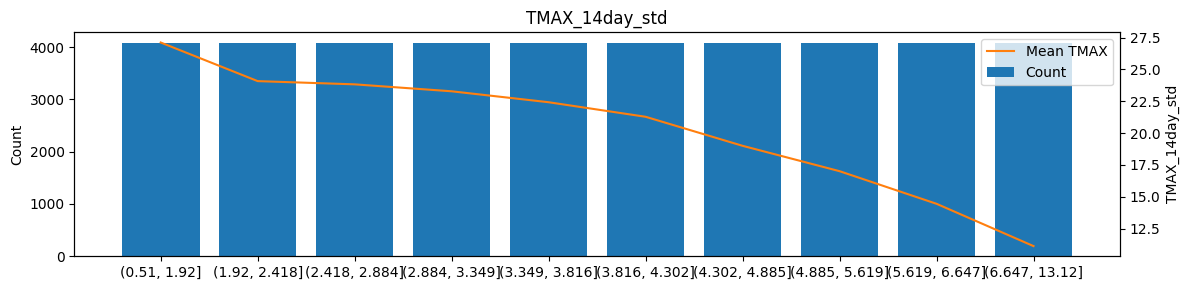




=== TMAX_14day_min ===


,count,mean,std,min,25%,50%,75%,max
TMAX_14day_min,40778.0,13.227696,11.598479,-22.7,5.6,13.9,22.8,39.4


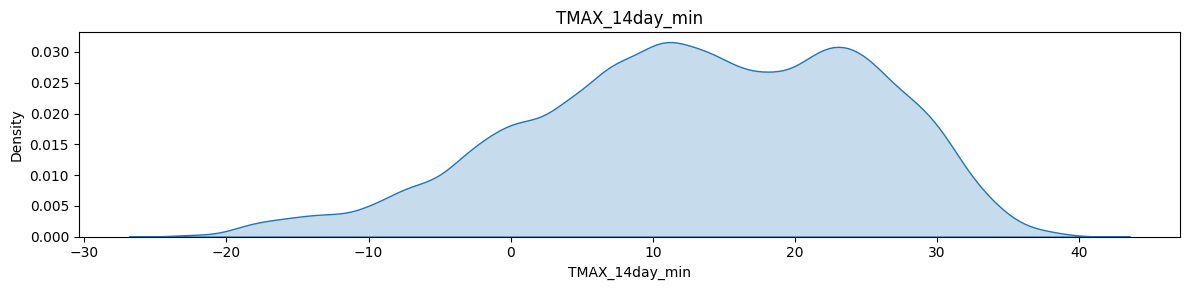

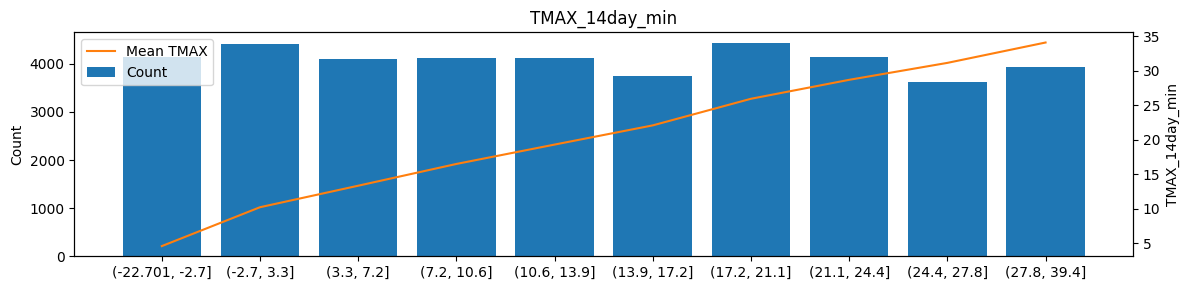




=== TMAX_14day_max ===


,count,mean,std,min,25%,50%,75%,max
TMAX_14day_max,40778.0,26.759174,8.587026,-6.6,20.6,27.8,33.3,53.9


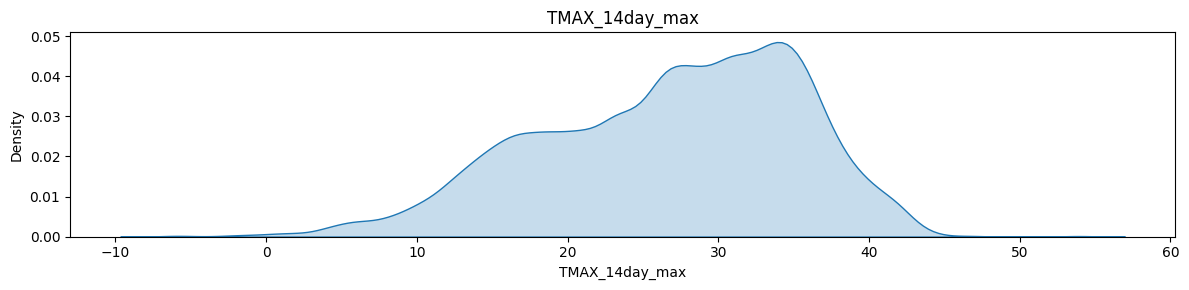

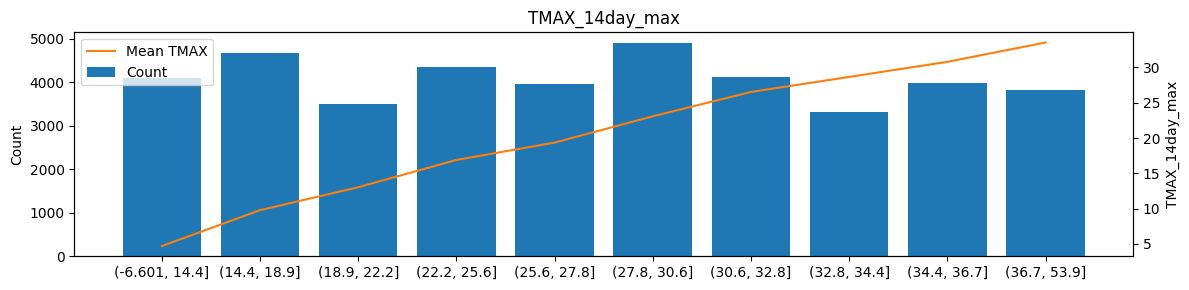




=== TMAX_14day_median ===


,count,mean,std,min,25%,50%,75%,max
TMAX_14day_median,40778.0,20.514654,9.978526,-13.5,13.05,21.4,28.9,41.7


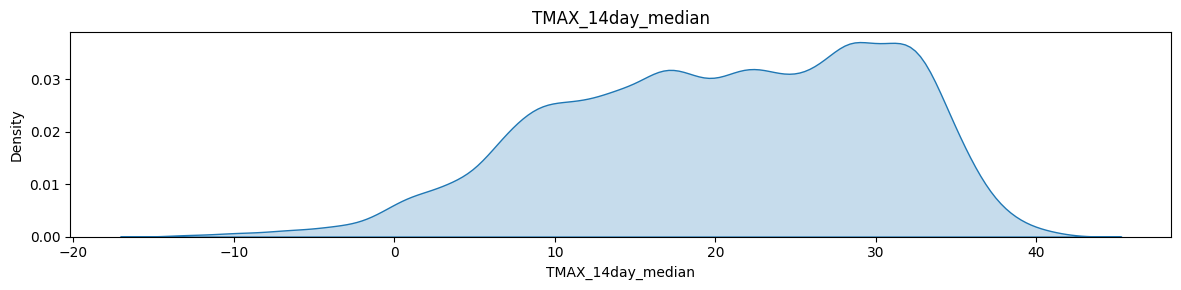

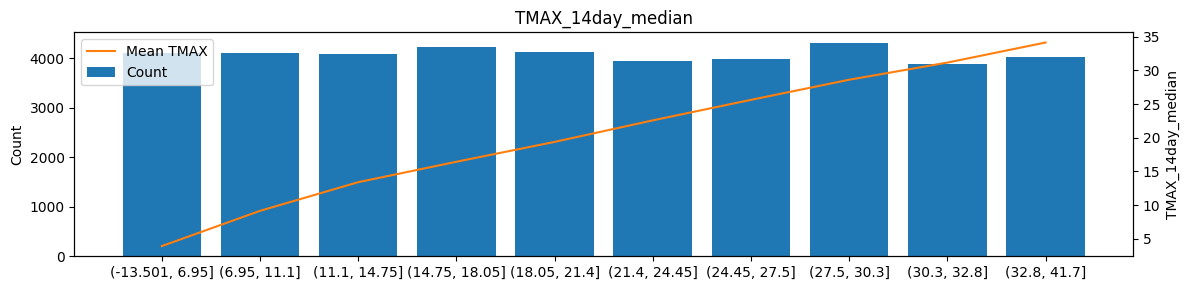




=== TMAX_3day_mean_diff ===


,count,mean,std,min,25%,50%,75%,max
TMAX_3day_mean_diff,40778.0,0.000374,2.110168,-12.0,-1.133333,0.0,1.133333,13.333333


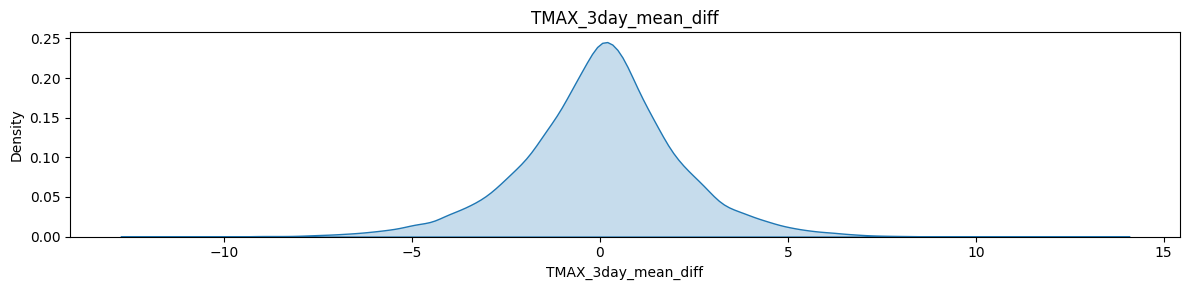

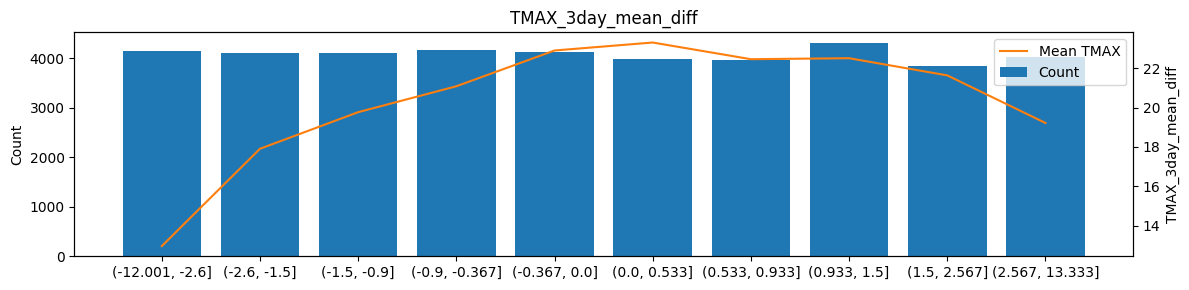




=== TMAX_5day_mean_diff ===


,count,mean,std,min,25%,50%,75%,max
TMAX_5day_mean_diff,40778.0,0.000482,1.347029,-7.9,-0.78,0.0,0.78,7.9


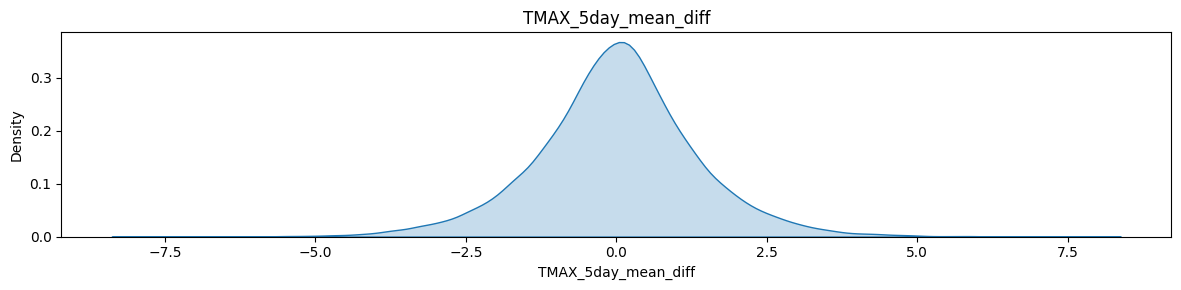

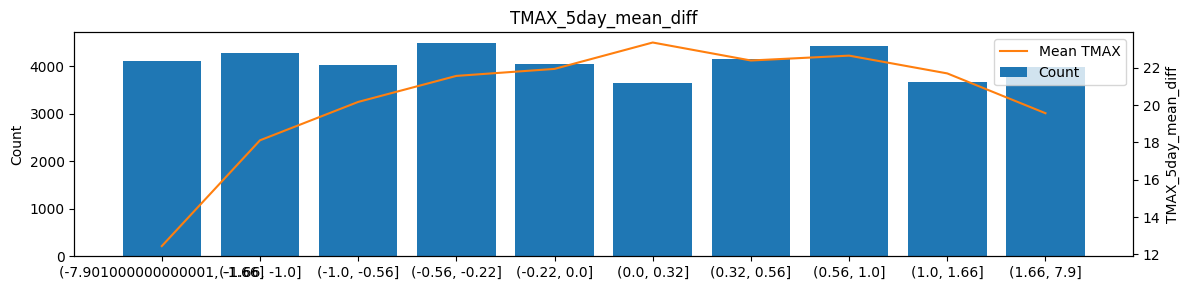




=== TMAX_7day_mean_diff ===


,count,mean,std,min,25%,50%,75%,max
TMAX_7day_mean_diff,40778.0,0.000883,0.986214,-5.0,-0.557143,0.0,0.557143,5.385714


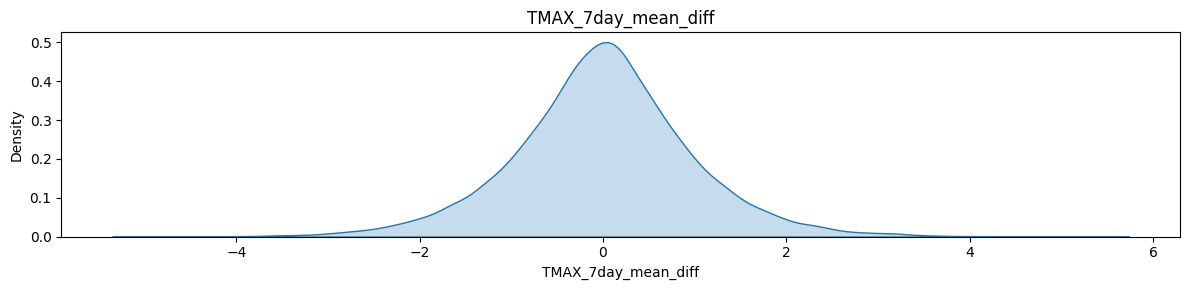

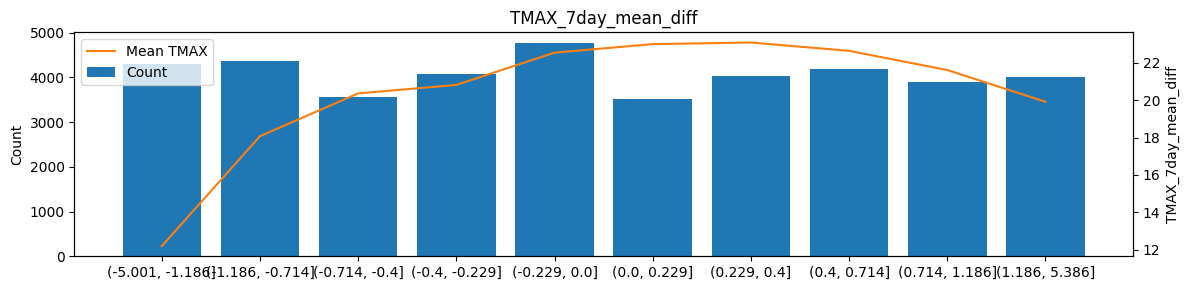




=== TMAX_10day_mean_diff ===


,count,mean,std,min,25%,50%,75%,max
TMAX_10day_mean_diff,40778.0,0.001272,0.710688,-3.44,-0.39,0.0,0.39,3.45


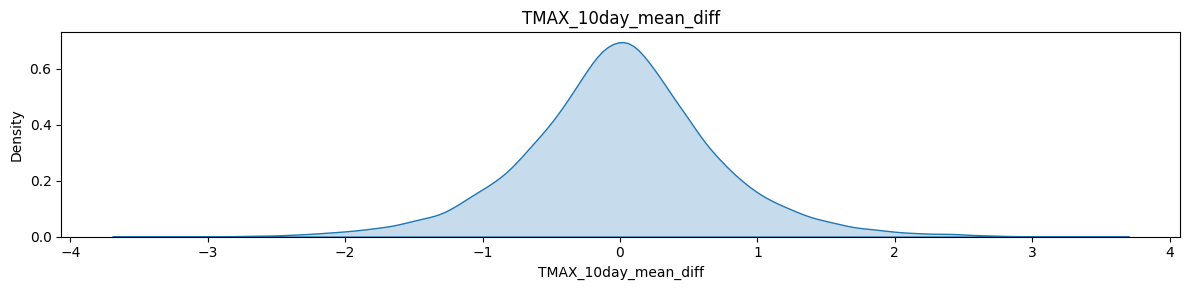

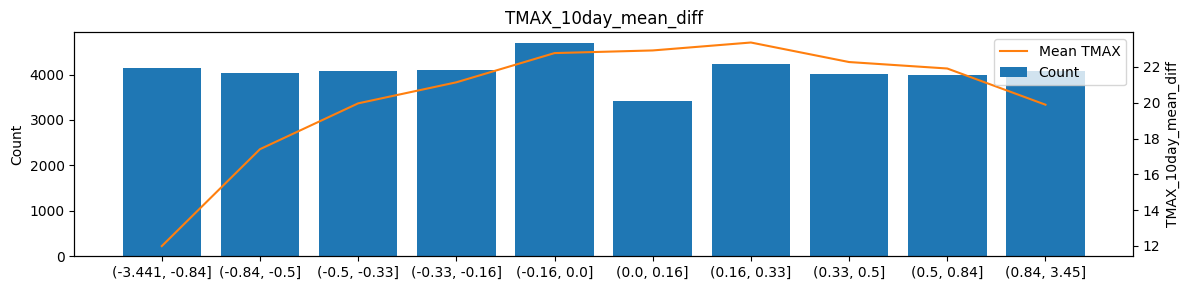




=== TMAX_14day_mean_diff ===


,count,mean,std,min,25%,50%,75%,max
TMAX_14day_mean_diff,40778.0,0.001507,0.51983,-2.535714,-0.314286,0.0,0.278571,2.7


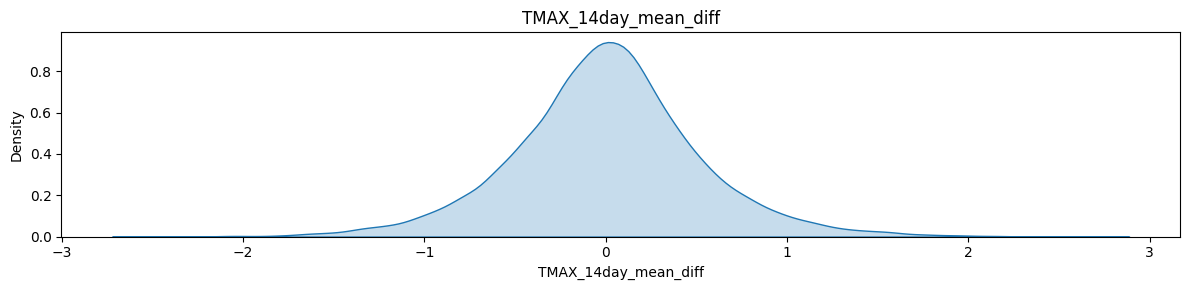

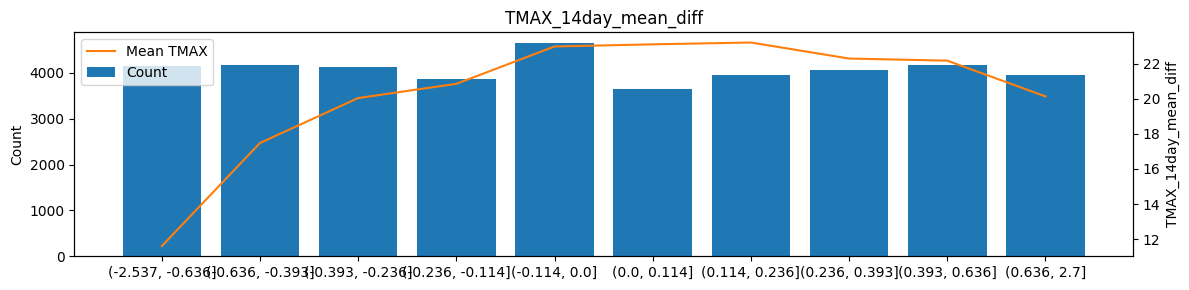




=== MONTH ===


,count,mean,std,min,25%,50%,75%,max
MONTH,40778.0,6.539801,3.440503,1.0,4.0,7.0,10.0,12.0


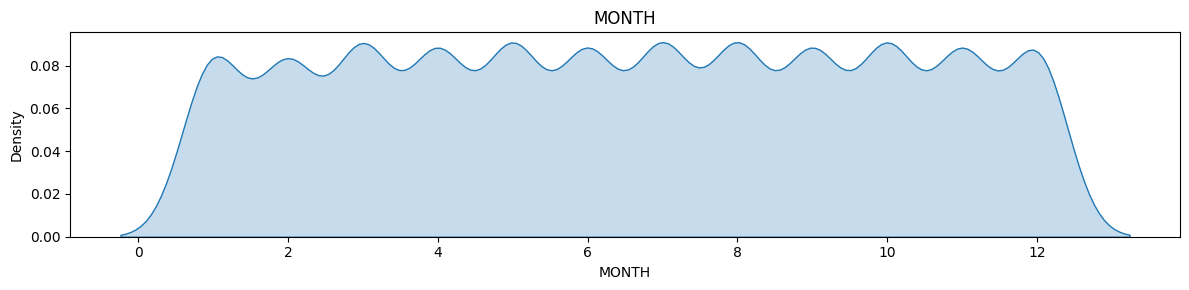

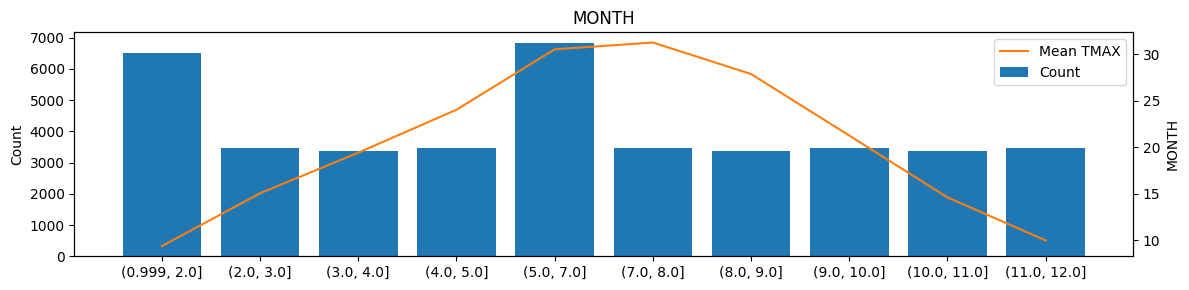




=== STATION_USW00003967 ===


,count,mean,std,min,25%,50%,75%,max
STATION_USW00003967,40778.0,0.124994,0.330716,0.0,0.0,0.0,0.0,1.0


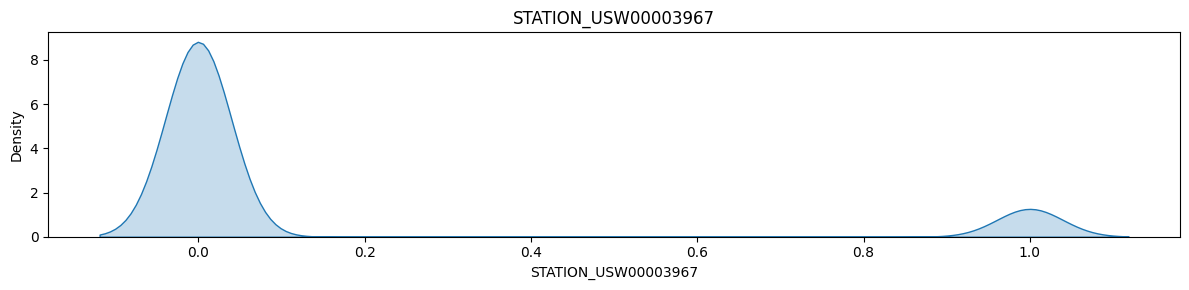

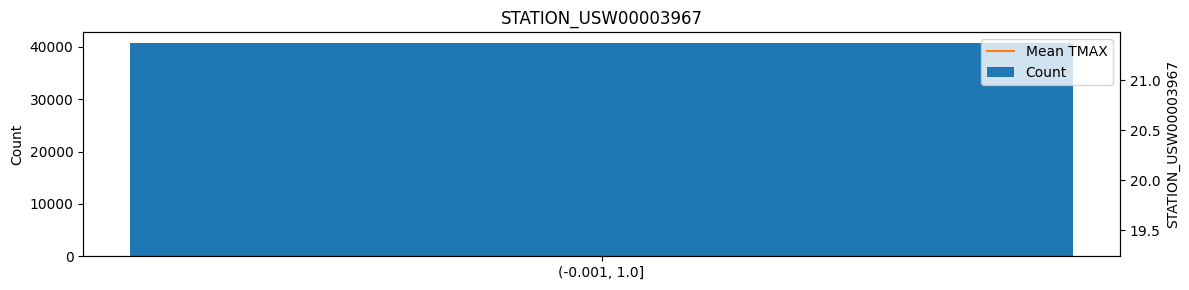




=== STATION_USW00012916 ===


,count,mean,std,min,25%,50%,75%,max
STATION_USW00012916,40778.0,0.125018,0.330744,0.0,0.0,0.0,0.0,1.0


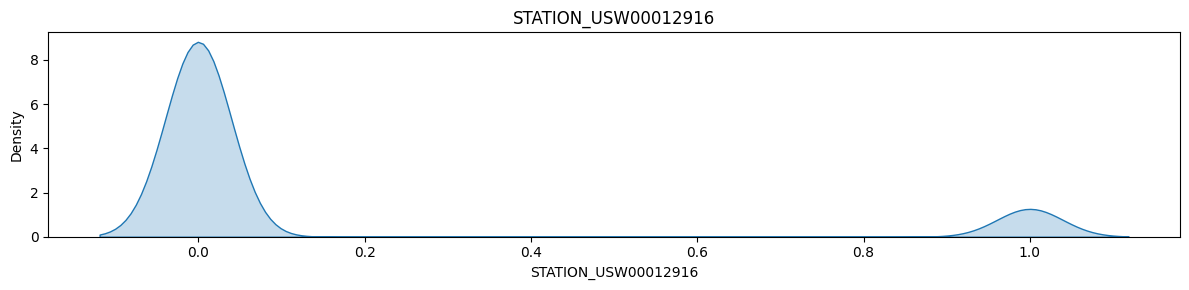

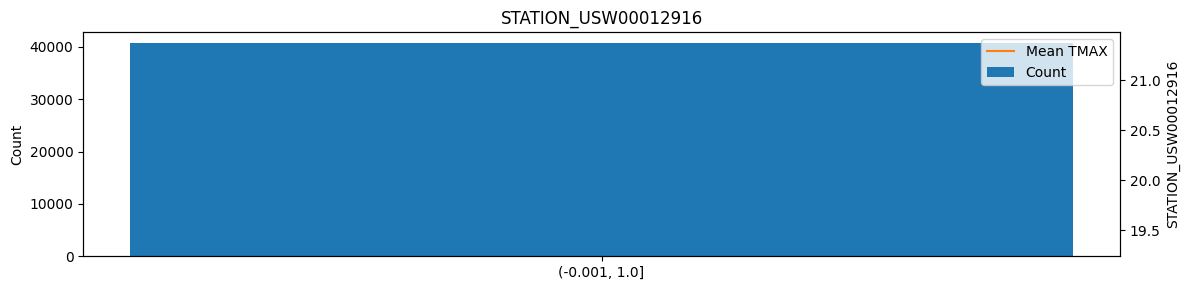




=== STATION_USW00013960 ===


,count,mean,std,min,25%,50%,75%,max
STATION_USW00013960,40778.0,0.125018,0.330744,0.0,0.0,0.0,0.0,1.0


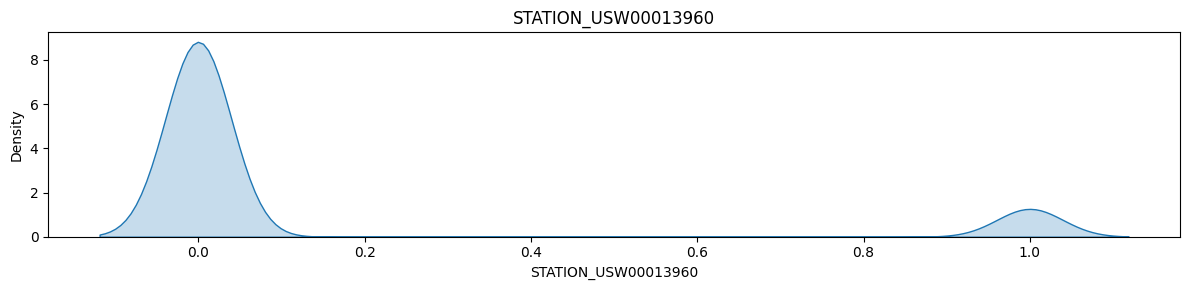

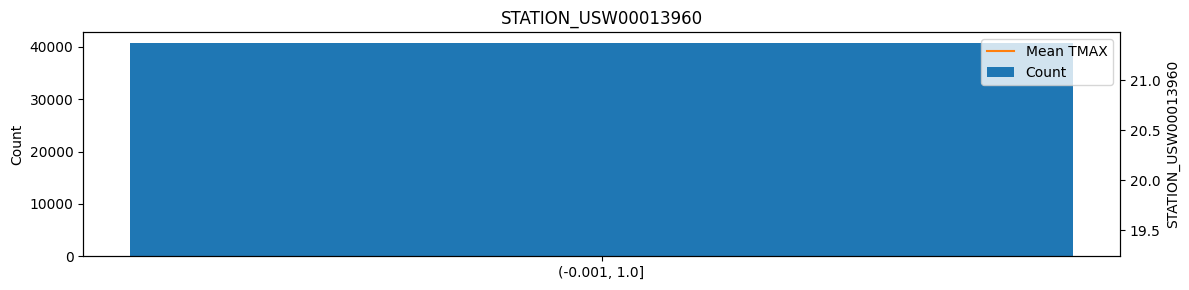




=== STATION_USW00024025 ===


,count,mean,std,min,25%,50%,75%,max
STATION_USW00024025,40778.0,0.125018,0.330744,0.0,0.0,0.0,0.0,1.0


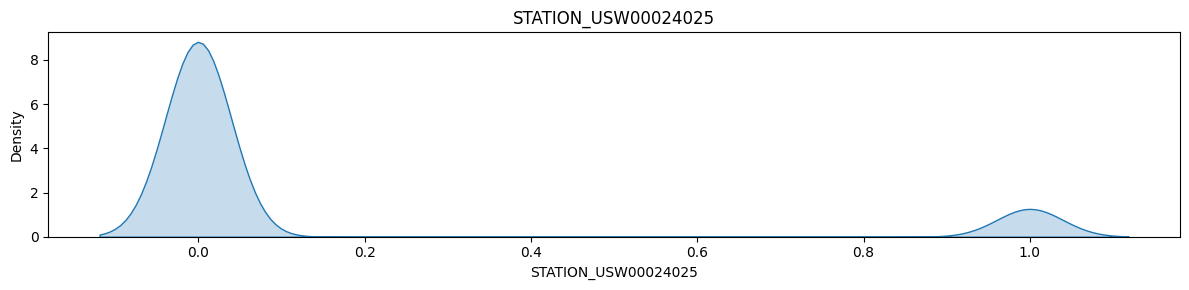

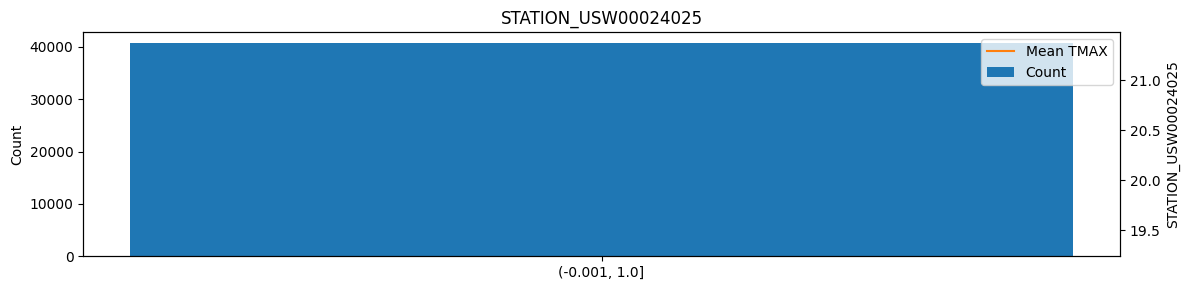




=== STATION_USW00024233 ===


,count,mean,std,min,25%,50%,75%,max
STATION_USW00024233,40778.0,0.125018,0.330744,0.0,0.0,0.0,0.0,1.0


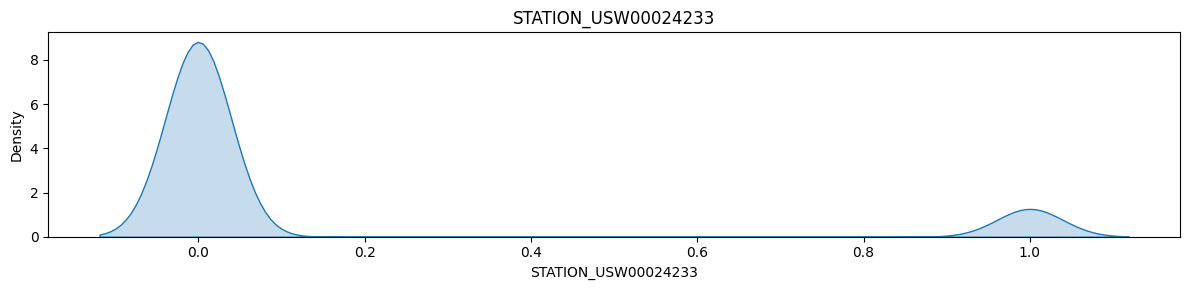

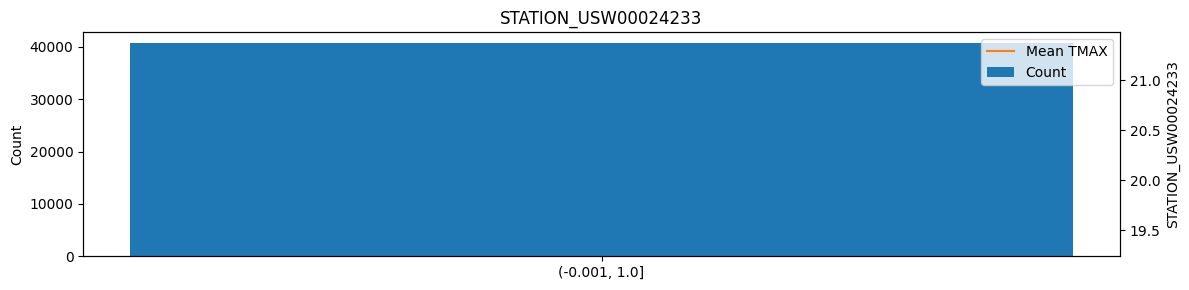




=== STATION_USW00093067 ===


,count,mean,std,min,25%,50%,75%,max
STATION_USW00093067,40778.0,0.124994,0.330716,0.0,0.0,0.0,0.0,1.0


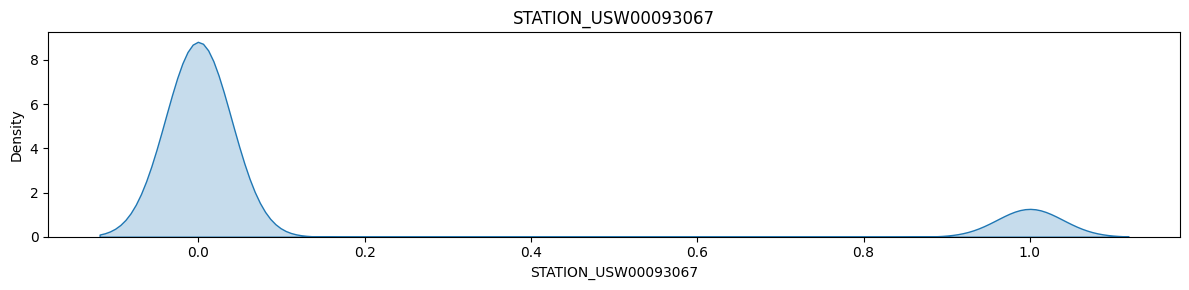

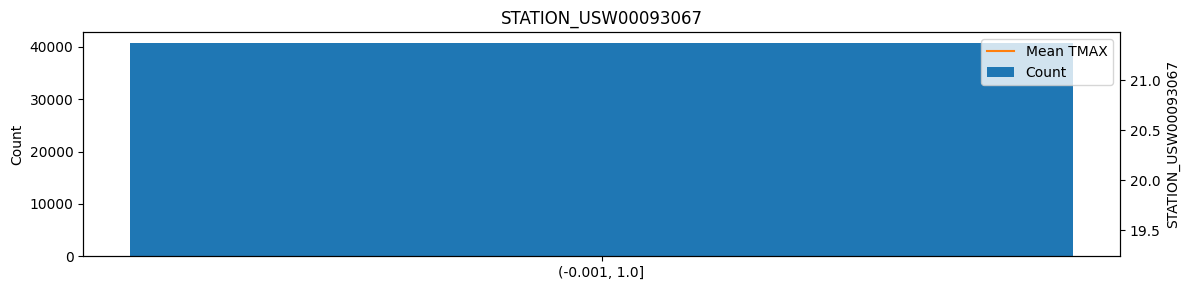




=== STATION_USW00093225 ===


,count,mean,std,min,25%,50%,75%,max
STATION_USW00093225,40778.0,0.12492,0.330633,0.0,0.0,0.0,0.0,1.0


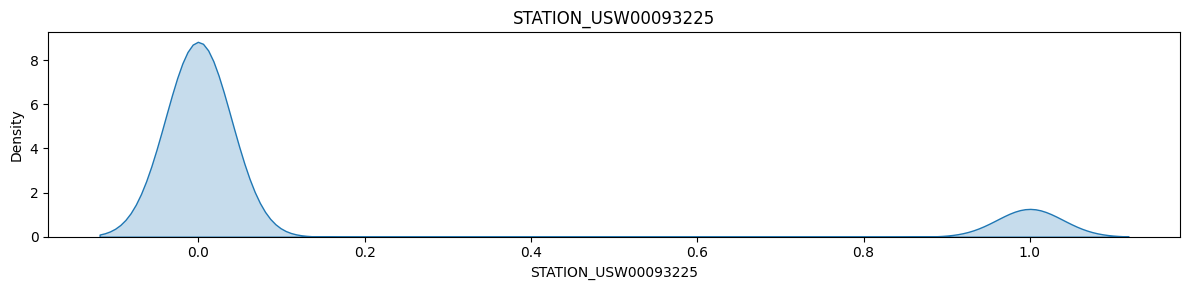

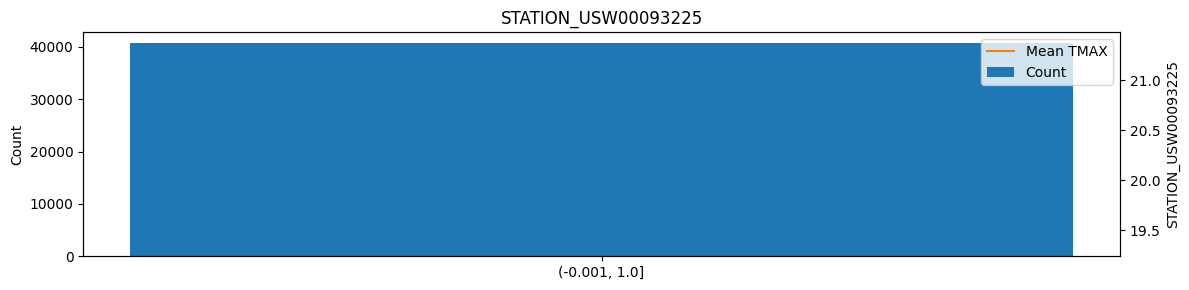




=== STATION_USW00094728 ===


,count,mean,std,min,25%,50%,75%,max
STATION_USW00094728,40778.0,0.125018,0.330744,0.0,0.0,0.0,0.0,1.0


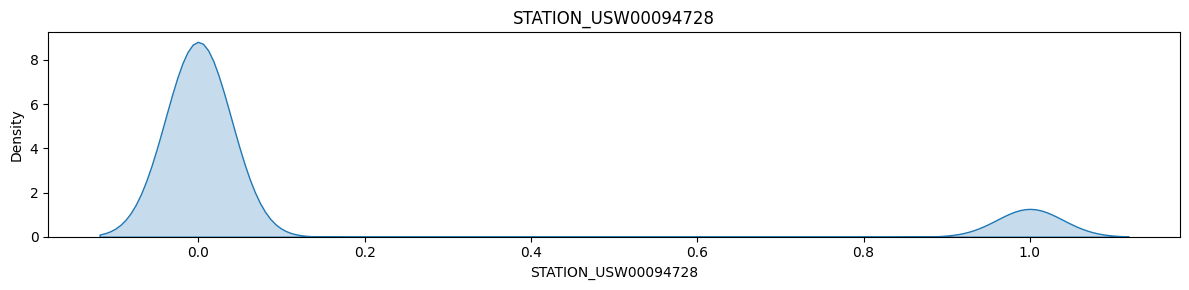

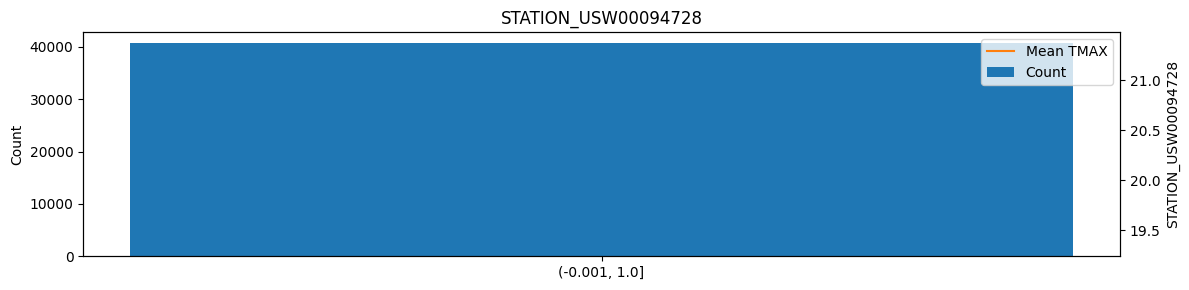




=== feature_grouped ===


,count,unique,top,freq
feature_grouped,40778,1,"(-0.001, 1.0]",40778


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

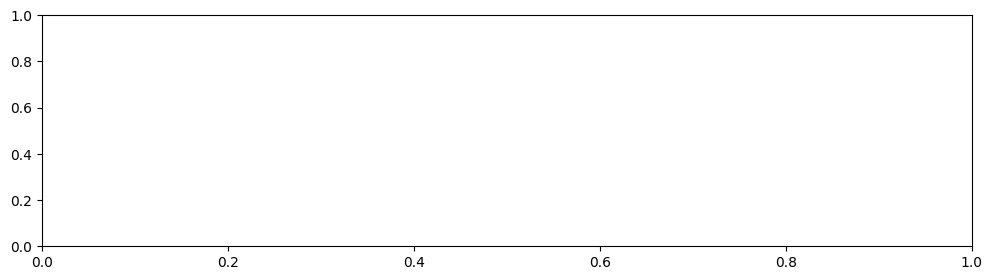

In [5]:
for feature in data.columns.values:
  if feature != 'TARGET':
    print(f"\n\n\n=== {feature} ===")
    describe(data, feature)
    kdeplot(data, feature)
    target_plot(data, feature, 'TARGET')